In [4]:
cd ~/EIT6-Crane-Control

In [27]:
pkg load signal

data1 = csvread("test/head_natural_frequency/angleData.csv");
data2 = csvread("test/head_natural_frequency/angleDataHand.csv");

time1 = data1(:,1)./1e6;
angle1 = data1(:,2);

time2 = data2(:,1)./1e6;
angle2 = data2(:,2);

In [15]:
function [Yd,td] = downsampler(Y,t,freq)
  Yd = [];
  td = [];
  prev_time = t(1);
  for i = 1:length(Y)
    if t(i) >= ( prev_time + (1/freq) )
      td(length(Yd)+1) = t(i);
      Yd(length(Yd)+1) = Y(i);
      prev_time = prev_time + (1/freq);
    endif  
  endfor  
  Yd = Yd' ; td = td';
endfunction

In [42]:
[A1, t1] = downsampler(angle1,time1,10);
[A2, t2] = downsampler(angle2,time2,10);

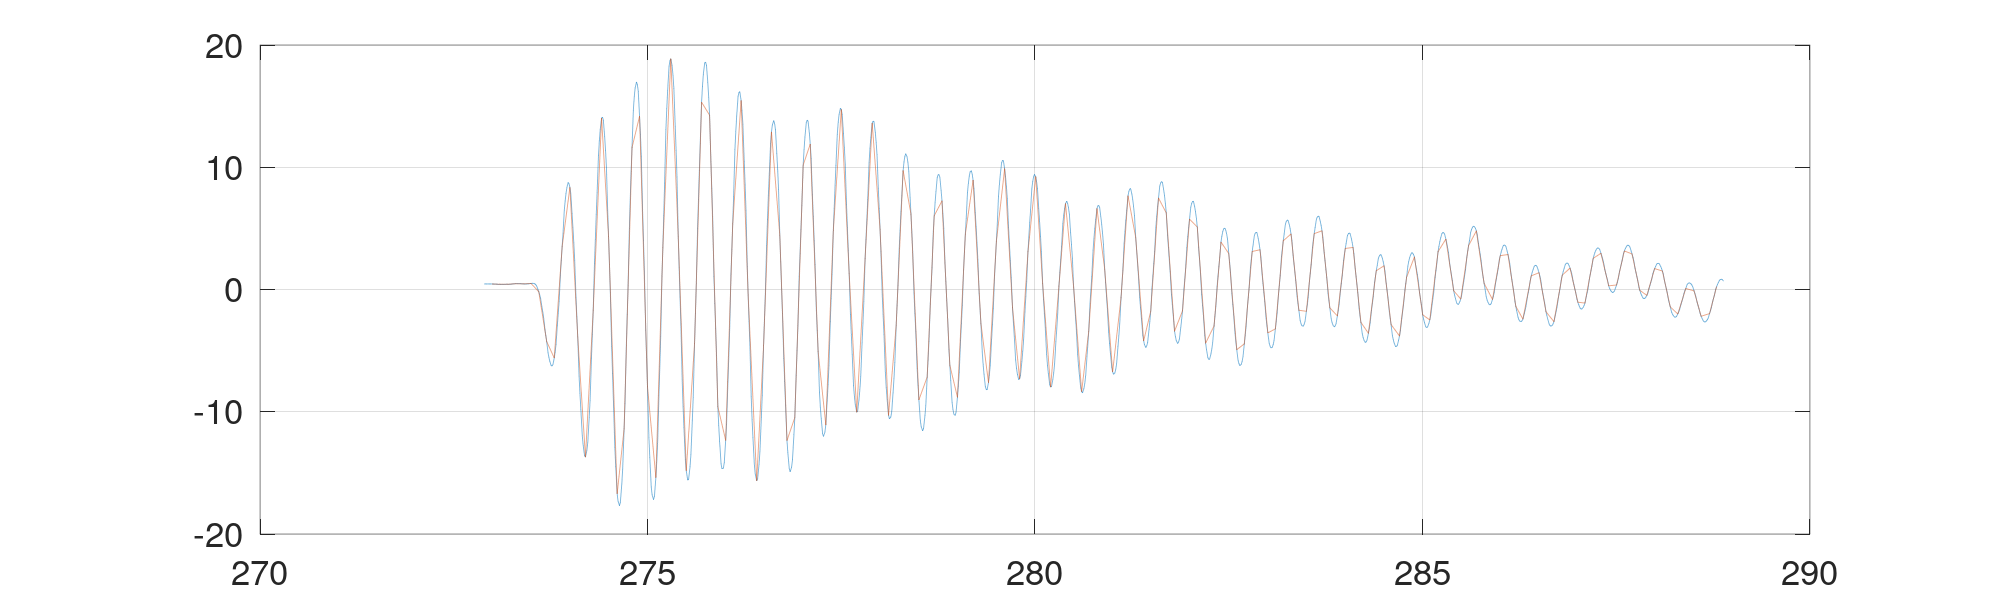

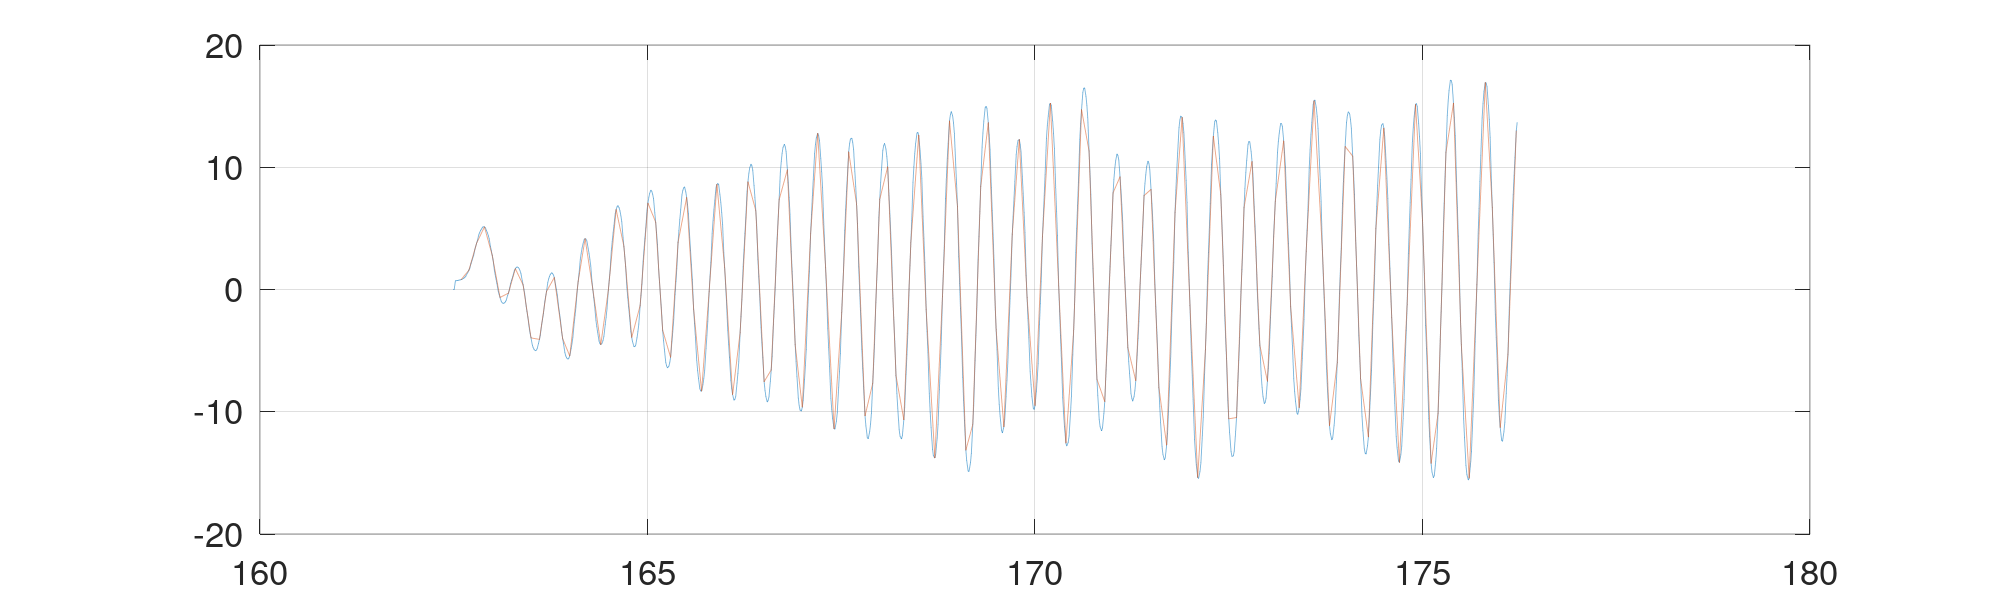

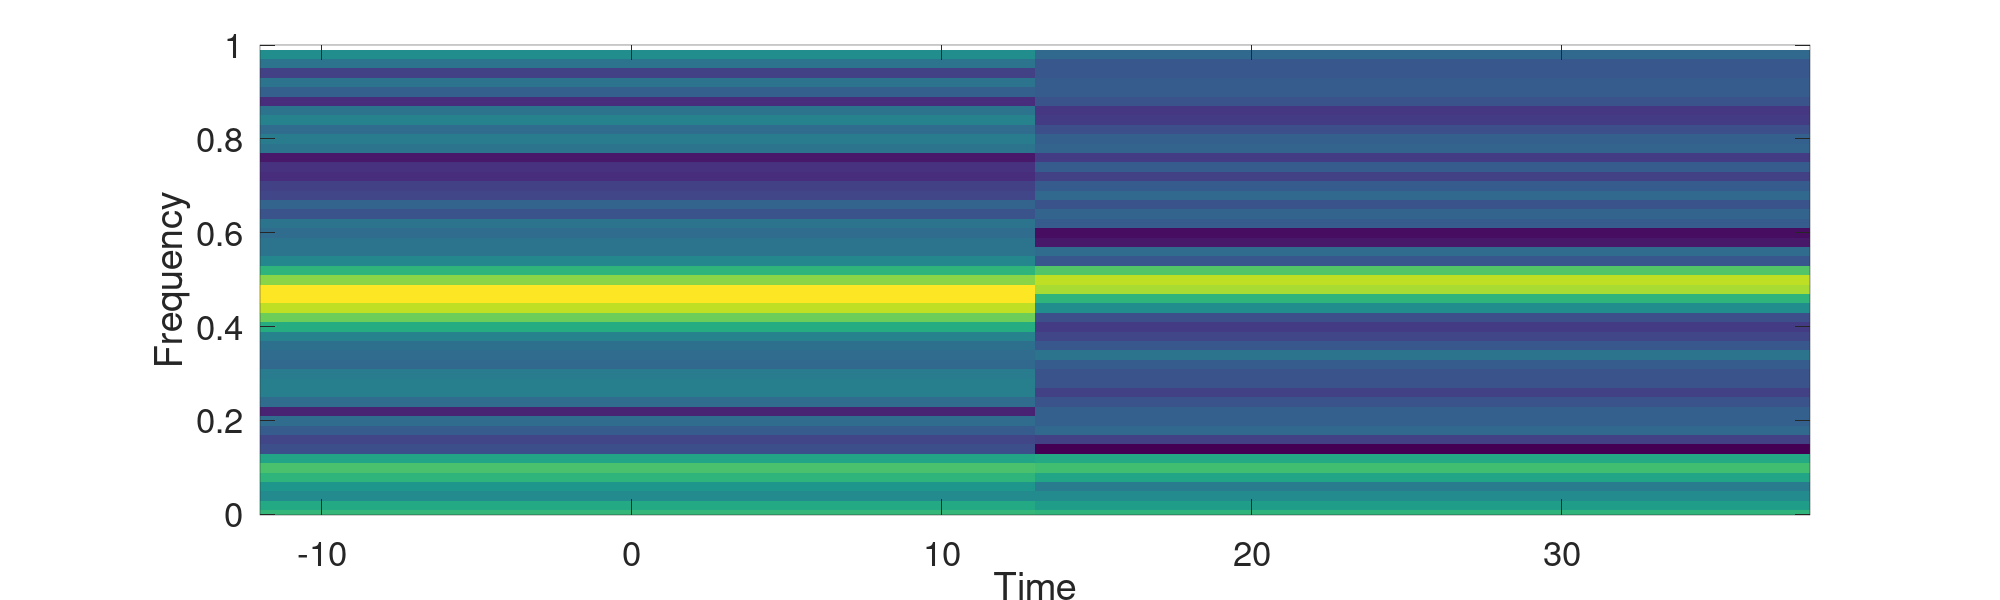

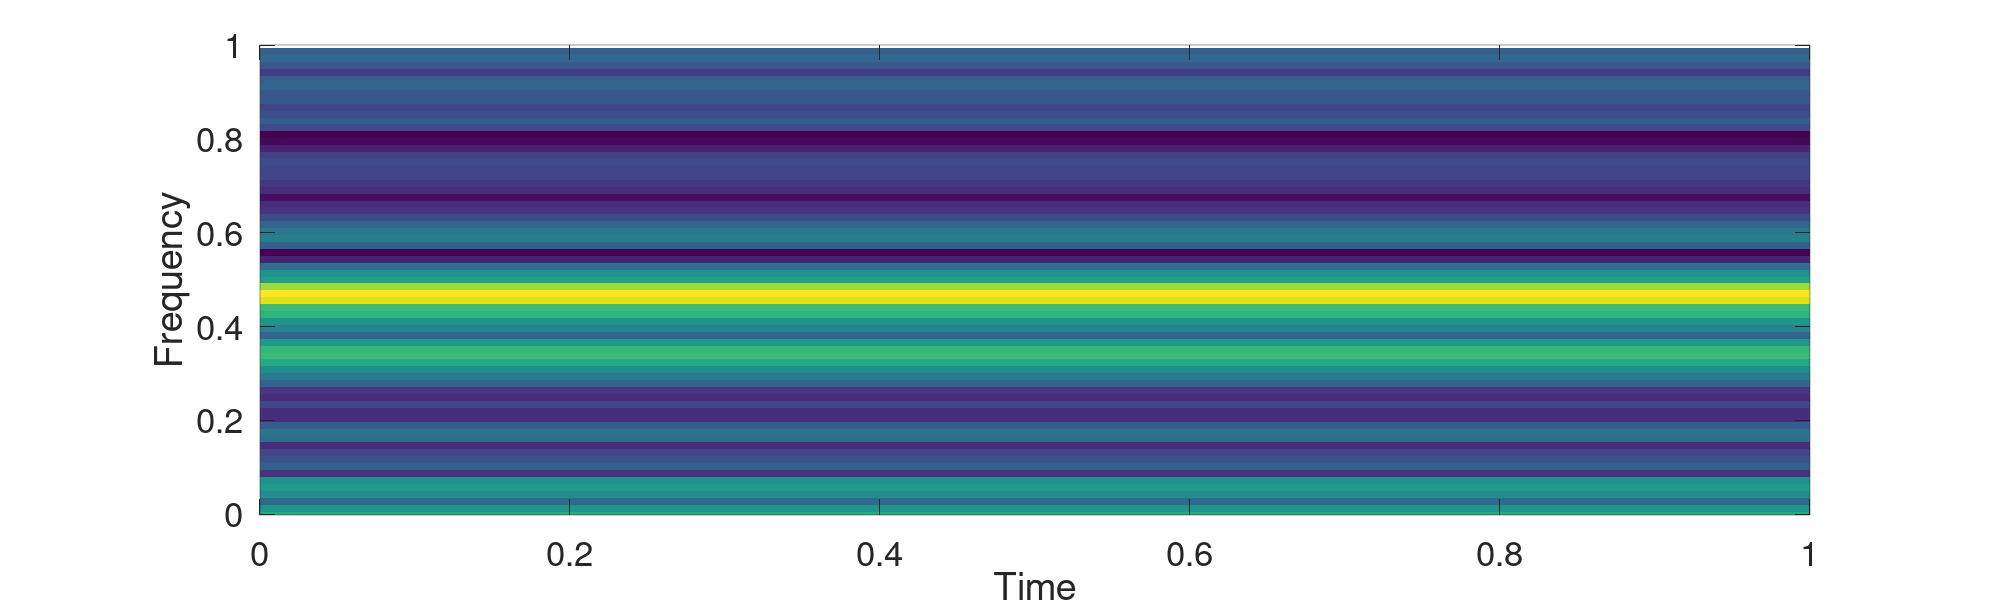

In [43]:
figure('position',[0,0,2000,600])
specgram(A1,floor((length(A1)-1)/1))
ylim([0 1])

figure('position',[0,0,2000,600])
specgram(A2,100)
ylim([0 1])

figure('position',[0,0,2000,600])
plot(time1,angle1)
hold on
plot(t1,A1)
grid on

figure('position',[0,0,2000,600])
plot(time2,angle2)
hold on
plot(t2,A2)
grid on